## Loading data

In [3]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [4]:
df = pd.read_csv('data/AirPassengers.csv')
df.head(5)

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [6]:

df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes




Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [7]:

df = df.rename(columns = {'Month': 'ds', 'AirPassengers': 'y'})
df.head(5)


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


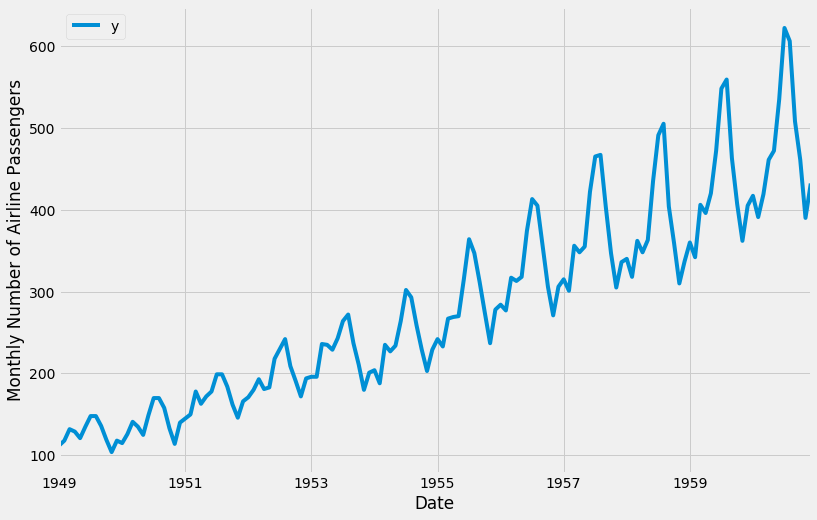

In [8]:

ax = df.set_index('ds').plot(figsize=(12,8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')
plt.show()



## Time Series forecasting with Prophet

In [9]:
from fbprophet import Prophet
my_model = Prophet(interval_width=0.95)
my_model.fit(df)


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [11]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.899403,605.437613,694.097452
176,1963-09-01,603.797886,557.867646,650.482186
177,1963-10-01,567.474404,526.501829,609.621182
178,1963-11-01,535.729802,492.396615,578.639383
179,1963-12-01,565.361891,523.698804,608.235753


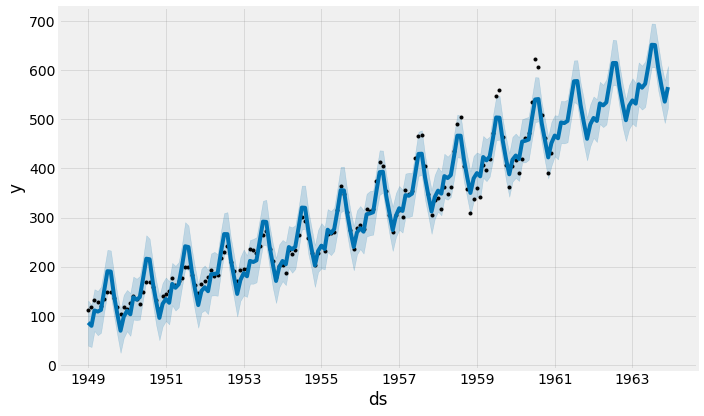

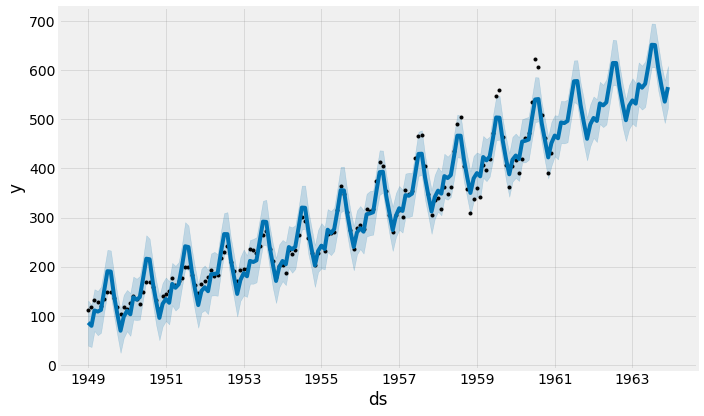

In [14]:
my_model.plot(forecast, uncertainty=True)

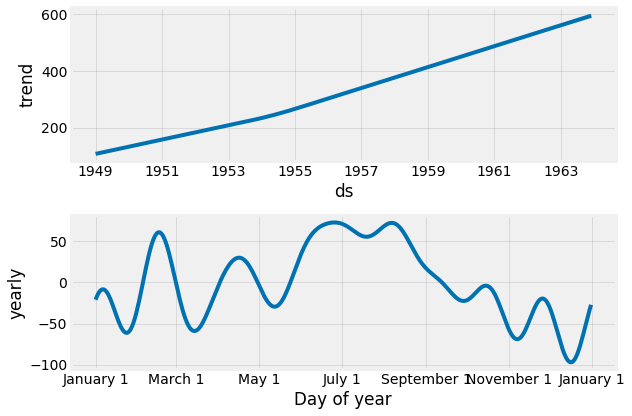

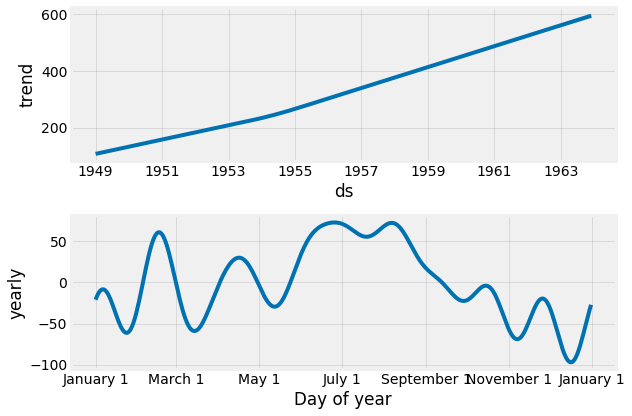

In [15]:
my_model.plot_components(forecast)